# Project: The Movie Database (TMDb) project 

## Questions for Analysis

Who is the director whose movies are more likely to be very popular ?

Which Director makes more Profit than most?

Which year(s) has the most popular movies?

Which month(s) has the most popular movies?

In [26]:
#import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

__Dataset Description__

This data set 
The dataset used for this project contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Downloaded from the kaggle website and contains 4803 rows and 20 columns.
The columns description are as follows:

__Columns Descreption:__

id, imdb_id : unique id or imdb id for each movie on TMDB (more about the popularity in this link.

popularity: a metric used to measure the popularity of the movie.

budget:the total budget of the moviein USD.

revenue:the total revenue of the movie in USD.

original_title: the original title of the movie.

cast:the names of the cast of the movie separated by "|".

homepage: the website of the movie (if it existed).

director:name(s) of the director(s) of the movie (separated by "|" if there are more than one director).

tagline:a catchphrase describing the movie.

keywords: keywords related to the movie.

overview:summary of the plot of the movie.

runtime:total runtime of the movie in minutes.

genres: genres of the movie separated by "|".

production_companies:production compan(y/ies) of the movie.

release_date:release date of the movie.

vote_count:number of voters of te movie.

vote_average:the average user rating of the movie

release_year:release year of the movie (from 1960 to 2015)

budget_adj:the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.

revenue_adj:the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.


In [27]:
movies = pd.read_csv('tmdb-movies.csv', sep = ',')

movies_df = pd.DataFrame(movies)
#first 3 rows
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
movies_df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
841,239566,tt2473602,0.648465,0,31911598,Get on Up,Chadwick Boseman|Nelsan Ellis|Dan Aykroyd|Viol...,NaN,Tate Taylor,The Funk Don't Quit,...,A chronicle of James Brown's rise from extreme...,139,Drama|Music,Universal Studios|Imagine Films Entertainment|...,8/1/14,105,6.3,2014,0.000000e+00,2.939349e+07
2894,13179,tt0823671,1.975355,48000000,0,Tinker Bell,Mae Whitman|Kristin Chenoweth|Raven-SymonÃ©|Lu...,http://disney.go.com/fairies/movies/about.html,Bradley Raymond,Enter the world of fairies,...,Journey into the secret world of Pixie Hollow ...,78,Animation|Family|Adventure|Fantasy,DisneyToon Studios|Walt Disney Animation Studi...,10/27/08,186,6.7,2008,4.861376e+07,0.000000e+00
4159,10605,tt0272147,0.115480,0,0,John Carpenterâ€™s Vampires: Los Muertos,Jon Bon Jovi|CristiÃ¡n de la Fuente|Diego Luna...,NaN,Tommy Lee Wallace,John Carpenter Presents,...,Tough-as-nails vampire hunter Derek Bliss is o...,93,Horror|Thriller|Action,Screen Gems|Storm King Productions,9/23/02,18,5.2,2002,0.000000e+00,0.000000e+00
7791,53216,tt0986272,0.090289,0,0,Validation,T. J. Thyne|Vicki Davis|Pam Cooke|Manolo Travi...,NaN,Kurt Kuenne,A fable about the magic of free parking.,...,A cheerful parking attendant considers it his ...,16,Comedy|Romance,Theatre Junkies,1/1/07,10,6.1,2007,0.000000e+00,0.000000e+00
6441,13393,tt0476735,0.265008,0,0,Babam ve oÄŸlum,Ã‡etin Tekindor|Fikret Kuskan|Binnur Kaya|Ã–zg...,NaN,Ã‡aÄŸan Irmak,NaN,...,"A Turkish man, whose wife died while giving bi...",108,Comedy|Drama,AvÅŸar Film,11/18/05,12,8.2,2005,0.000000e+00,0.000000e+00


In [29]:
movies_df.shape

(10866, 21)

In [30]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [31]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* id should be string not integer.
* Homepage, imbd_id, keywords, production_companies, budget, revenue, cast, tagline, overview,  is not needed for analysis.
* release_date is string instead of datetime.
* release year is string instead of datetime.
* Genre, cast and Director has multiple values while they are not an issue, the main genre will tell us more story.
* Profit generated can be known through Revenue adj and budget adj.

In [32]:
movies_df.duplicated().sum()

1

* There is one duplicate issue

In [33]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* Runtime, budget_adj, revenue_adj cannot be zero

__Observations__

* id should be string not integer. Release_date and release year are string and should be converted to datetime.

* Homepage, imbd_id, keywords, production_companies, budget, revenue, tagline, overview,  is not needed for analysis.

* Duplicate issue is present.

* Genre, cast and Director has multiple values while they are not an issue, more inside story will help the analysis.

* Profit generated can be known through Revenue adj and budget adj.

* Runtime, budget_adj, revenue_adj cannot be zero


### Data Cleaning


### Issue #1:

In [34]:
movies_df['id'] = movies_df['id'].astype(str)
movies_df['release_year'] = pd.to_datetime(movies_df['release_year'])
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

### Issue #2

In [35]:
movies_df.drop(['imdb_id','homepage','tagline','production_companies','overview','keywords','budget','revenue'],axis=1,inplace=True)
# The unnecessary columns in my analysis are dropped.
# The revenue and budget columns columns are dropped and the adjusted columns will be used.

### Issue #3

In [36]:
movies_df.drop_duplicates(inplace = True)

### Issue #4

In [37]:
movies_df['main_genre']=movies_df.genres.str.split(pat='|',expand=True)[0]
movies_df['leading_actor']=movies_df.cast.str.split(pat='|',expand=True)[0]
movies_df['main_director']=movies_df.director.str.split(pat='|',expand=True)[0]

movies_df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,leading_actor,main_director
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Colin Trevorrow
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,Action,Tom Hardy,George Miller


__New Columns Descreption:__
main_genre: the main genre of the movie (the first genre in the genres list).
leading_actor: the leading actor/actress of the movie (the first name in the cast list).
main_director:the main director of the movie (if there are more than one director).
profit:the net profet of the movie (calculated by profit=revenue-budget).

### Issue #5

In [38]:
movies_df['profit']=movies_df.revenue_adj-movies_df.budget_adj

In [39]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


### Issue #6

In [40]:
#drop invalid datas in the dataset
missing = movies_df.query('budget_adj == 0 or revenue_adj == 0 or runtime == 0').index
movies_df.drop(missing, axis = 0, inplace = True)

In [41]:
movies_df.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08,9.282470e+07
std,1.475162,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08,1.940715e+08
min,0.001117,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.462368,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,0.797511,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07,2.737064e+07
75%,1.368324,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08,1.074548e+08
max,32.985763,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09,2.750137e+09


### Research Question 1 (Who is the director whose movies are more likely to be very popular ?)

In [45]:
def categorized(movies_df, column_label, bin_name):
    bin_edges=[
    movies_df[column_label].describe()['min'],
    movies_df[column_label].describe()['25%'],
    movies_df[column_label].describe()['50%'],
    movies_df[column_label].describe()['75%'],
    movies_df[column_label].describe()['max']]
    categorized_column_label="categorized_"+column_label
    movies_df[categorized_column_label]=pd.cut(movies_df[column_label], bin_edges, labels = bins)
    return movies_df

In [46]:
bins = ['Not popular', 'Somewhat popular', 'Popular', 'Very popular']
movies_df = categorized(movies_df, 'popularity', popularity_bin_names)
movies_df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,leading_actor,main_director,profit,categorize_popularity,categorized_popularity
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Colin Trevorrow,1.254446e+09,Very popular,Very popular
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,Action,Tom Hardy,George Miller,2.101614e+08,Very popular,Very popular
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Robert Schwentke,1.704191e+08,Very popular,Very popular
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09,Action,Harrison Ford,J.J. Abrams,1.718723e+09,Very popular,Very popular
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09,Action,Vin Diesel,James Wan,1.210949e+09,Very popular,Very popular


In [47]:
movies_df.groupby('categorized_popularity').agg(lambda x:x.value_counts().index[0])['main_director']

categorized_popularity
Not popular               Wes Craven
Somewhat popular      Clint Eastwood
Popular                  Kevin Smith
Very popular        Steven Spielberg
Name: main_director, dtype: object

**The director whose movies are more likely to be verrry popular is Steven Spielberg** 

### Research Question 2: (Which Director makes more Profit than most)

In [48]:
bins=['Big Loss','Loss','Medium Profit','High Profit']
movies_df=categorized(movies_df, 'profit', bins)
movies_df.head()

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,leading_actor,main_director,profit,categorize_popularity,categorized_popularity,categorized_profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Colin Trevorrow,1.254446e+09,Very popular,Very popular,High Profit
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,Action,Tom Hardy,George Miller,2.101614e+08,Very popular,Very popular,High Profit
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Robert Schwentke,1.704191e+08,Very popular,Very popular,High Profit
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09,Action,Harrison Ford,J.J. Abrams,1.718723e+09,Very popular,Very popular,High Profit
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09,Action,Vin Diesel,James Wan,1.210949e+09,Very popular,Very popular,High Profit


In [49]:
movies_df.groupby('categorized_profit').agg(lambda x:x.value_counts().index[0])['main_director']

categorized_profit
Big Loss             Renny Harlin
Loss                  Kevin Smith
Medium Profit      Clint Eastwood
High Profit      Steven Spielberg
Name: main_director, dtype: object

**The Director who generates more profit in making movie is Steven Spielberg...The movies he directs must be really interesting**

### Research Question 3 (Which year(s) has the most popular movies?)

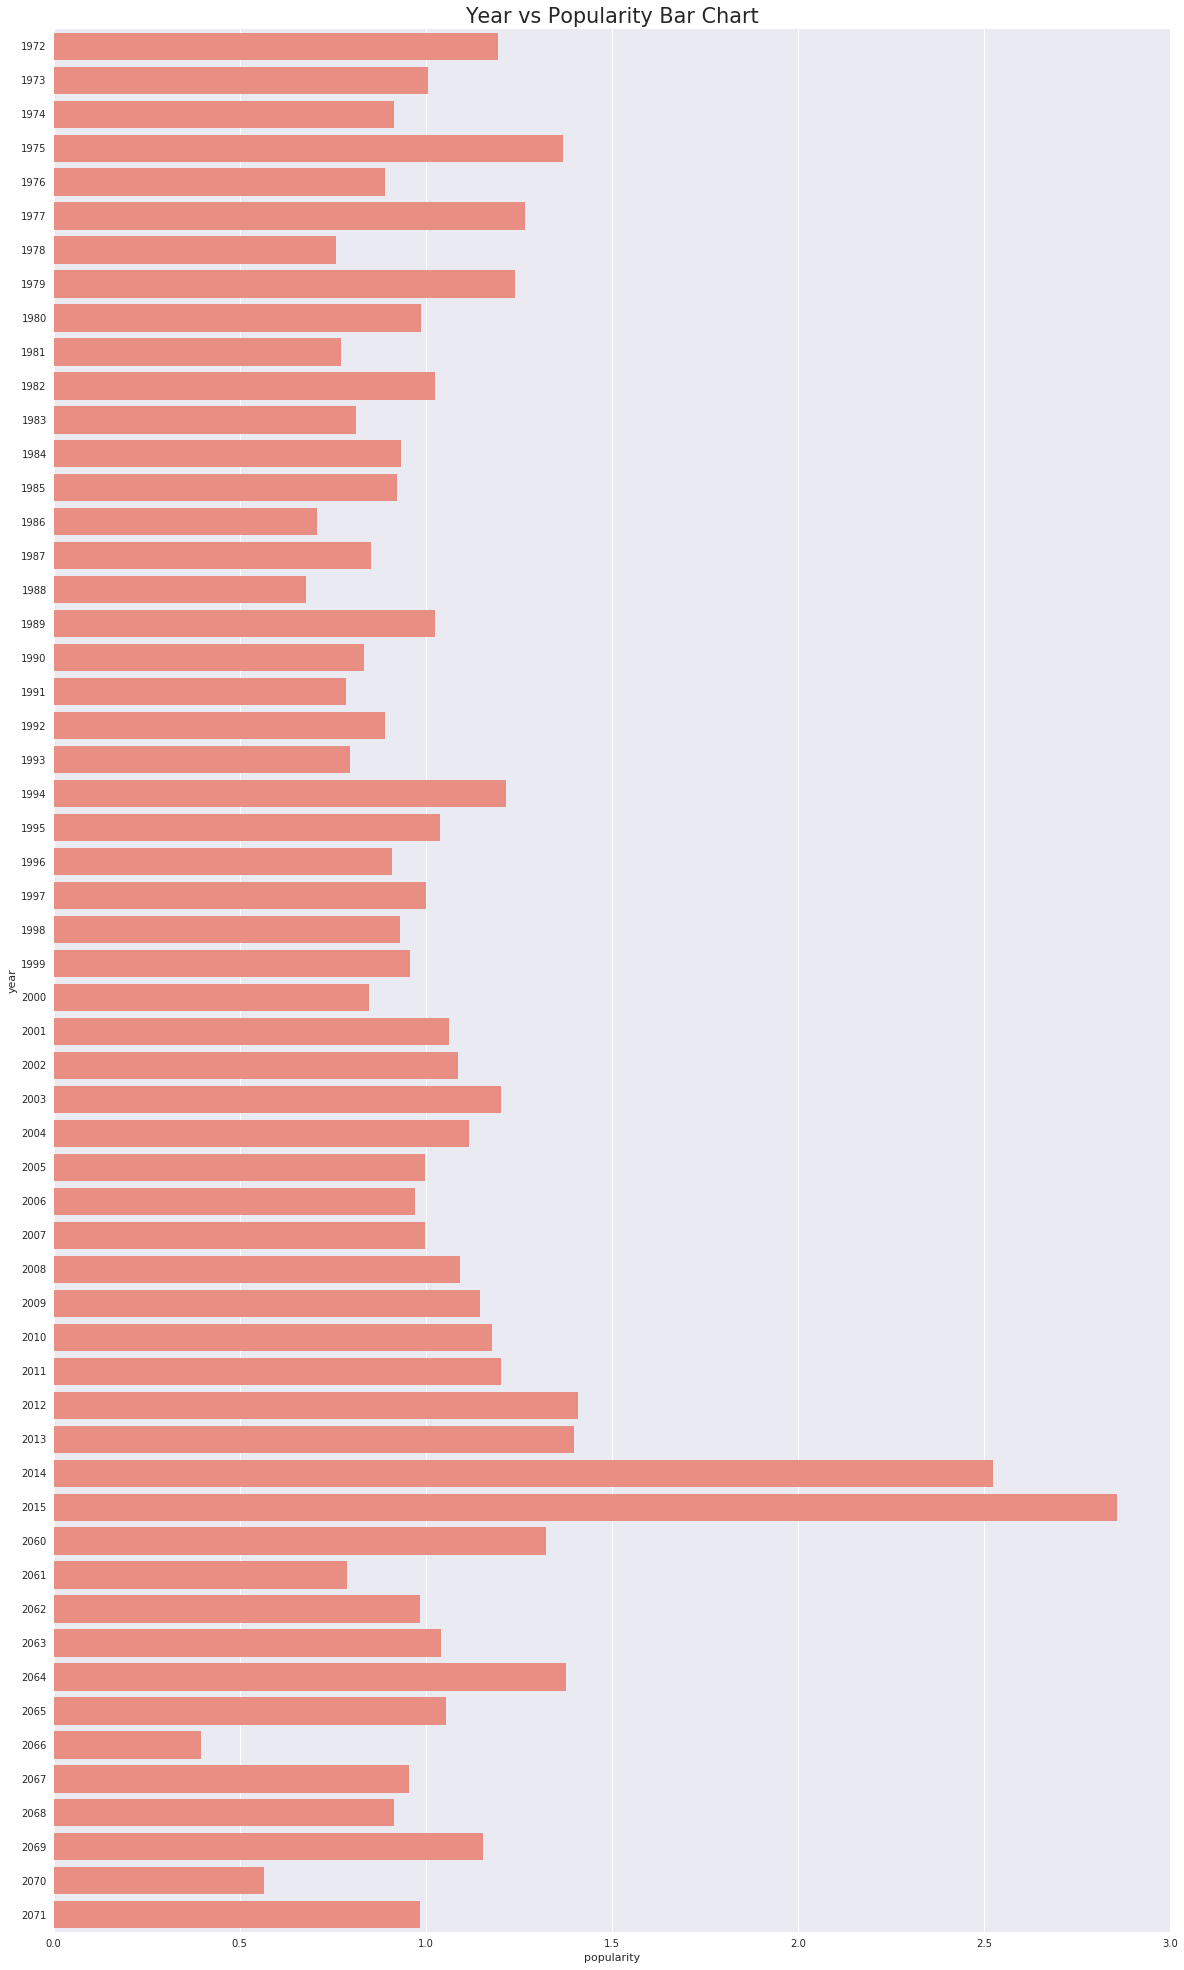

In [50]:
movies_df['year'] = movies_df['release_date'].dt.year
YearPopMean=movies_df.groupby('year')['popularity'].mean()
sns.set(rc={'figure.figsize':(20,35)})
sns.barplot(x=YearPopMean, y=YearPopMean.index,orient='h', color = "salmon").set_title("Year vs Popularity Bar Chart",fontsize='xx-large');


**From the plot 2015 has the most popular movies followed by 2014 with 1966 being the year with least movie popularity**

### Research Question 4  (Which month(s) has the most popular movies?)

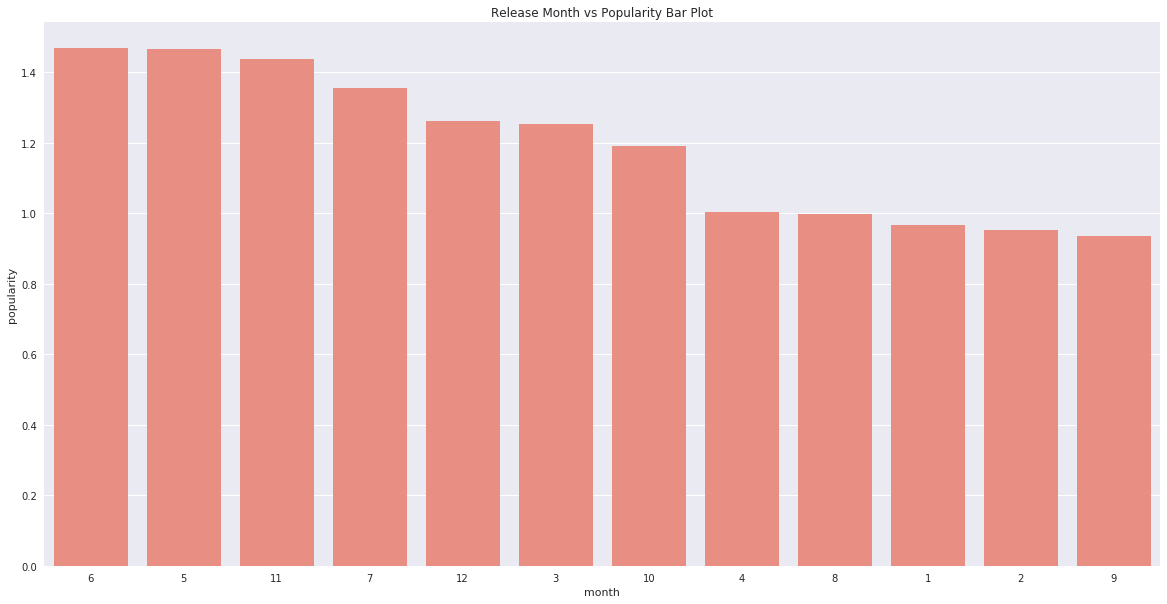

In [51]:
movies_df['month'] = movies_df['release_date'].dt.month
MonthPopMean=movies_df.groupby('month')['popularity'].mean()
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=MonthPopMean.index, y=MonthPopMean, color = "salmon", order = [6, 5, 11, 7, 12, 3, 10, 4, 8, 1, 2, 9]).set_title("Release Month vs Popularity Bar Plot");

The 6th, 5th and 11th months of the year have the most popular movies though the different isn't drastic that much. Movies are popular every moth of the year on an average.

## Research Question 5(Which movie type(s) is likely to bring in more high profit?)

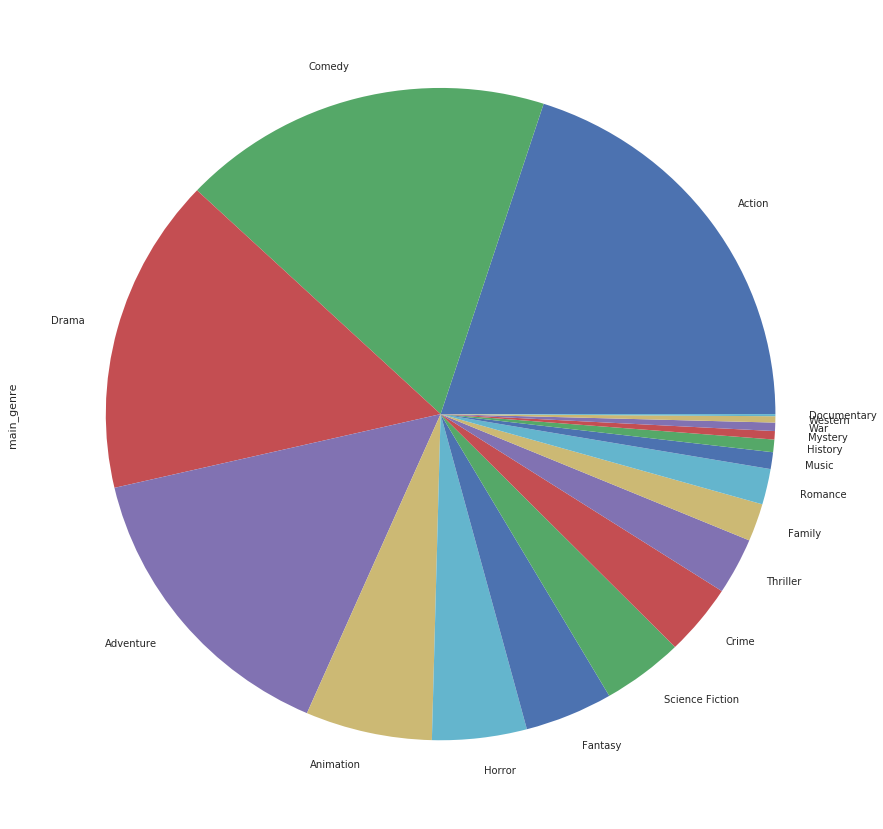

In [52]:
movies_df[movies_df['categorized_profit']=='High Profit']['main_genre'].value_counts().plot.pie(figsize=(15,15));

Now the piechart of the main genre of the movie based on its categorized profit shows that the majority of high profit movies are action, comedy, drama or adventure.

<a id='eda'></a>
# Conclusions

After cleaning the issues I highlighted, I explored this dataset to find answers to this 5 questions:
* Who is the director whose movies are more likely to be very popular ?

* Which Director makes more Profit than most?

* Which year(s) has the most popular movies?

* Which month(s) has the most popular movies?

* Which movie type(s) is likely to bring in more high profit?



** The director whose movies are more likely to be very popular is Steven Spielberg.

** The Director who generates more profit in making movie is Steven Spielberg. 

** 2015 and 2014 has the most popular movies.

** The 6th, 5th and 11th months of the year have the most popular movies.

** The major genre of high profit movies are action, comedy, drama or adventure.

In conclusion, one movie or the other can be popular because of the director, the genre, the profit it made and what time of year it was introduced. 

## Limitations

* We have used TMBD Movies dataset for our analysis and worked with popularity, revenue, budget and Director. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

* The dataset has many missing values for the budget, revenue and profit so tha the analysis could show unintentional bias towards the profit.

* The dataset does not have not have recent movies data included and thing may have changed than this dataset shows like the most movie month may not be the middle and end of year again.


In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0